In [144]:
#Cell 1
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

In [145]:
#Cell2
#Defining all the necessary symbols in the equations
b, v, m = sy.symbols('b v m')
t = sy.symbols("t", real = True)
g = sy.symbols('g', real=True)
u = sy.symbols('u')
uT, vz = sy.symbols('uT vz', real=True)

In [146]:
#Cell 3
#8
v2 = sy.symbols("v2")
sy.integrate(m / (b * u**2 - m * g), (u, 0, v2))

-m*(sqrt(1/(b*g*m))*log(-g*m*sqrt(1/(b*g*m)))/2 - sqrt(1/(b*g*m))*log(g*m*sqrt(1/(b*g*m)))/2) + m*(sqrt(1/(b*g*m))*log(-g*m*sqrt(1/(b*g*m)) + v2)/2 - sqrt(1/(b*g*m))*log(g*m*sqrt(1/(b*g*m)) + v2)/2)

In [147]:
#Cell 4
#10
gt = sy.integrate(uT**2/(u**2-uT**2), (u, 0, vz))
gt = gt.subs({sy.log(-uT): sy.log(uT), sy.log(-uT + vz): sy.log(uT - vz)})
gt = sy.simplify(gt)
gt

uT*(log(uT - vz) - log(uT + vz))/2

In [148]:
#Cell 5
#11
equation_11 = sy.simplify(uT / 2 * sy.log(uT - vz)) - (uT / 2 * sy.log(uT + vz))
print(equation_11)
print(gt)

#Check if the 2 equations are the same
if gt.expand() == equation_11.expand():
    print("These two equations are identical")


uT*log(uT - vz)/2 - uT*log(uT + vz)/2
uT*(log(uT - vz) - log(uT + vz))/2
These two equations are identical


In [149]:
#Cell 6
#13
vz = sy.solve(sy.Eq(gt, g*t), vz)
vz


[-uT*tanh(g*t/uT)]

In [150]:
#Cell 7
#14
expr = -uT * sy.tanh(t * g / uT)
sy.simplify(sy.integrate(expr, (t)))

Piecewise((uT*(-t + uT*log(tanh(g*t/uT) + 1)/g), Ne(g, 0)), (0, True))

In [151]:
#Cell 8
#Rearranging to get equation (14)
z, z0 = sy.symbols('z, z0')
z = z0 - uT**2 / g * sy.ln(sy.cosh(g * t / uT))
z

z0 - uT**2*log(cosh(g*t/uT))/g

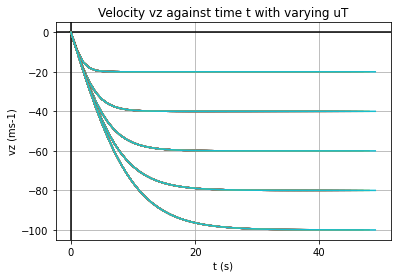

In [152]:
#Cell 9
#Set up for a range of values for uT, and time t
uT_values = np.arange(0, 102, 20)
t_values = np.arange(0, 50, 1)
vz_values = []


#plotting vz against time, looping through different values of uT to draw multiple lines
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.xticks(np.arange(0, 120, 20))
plt.axvline(x=0, color='k')
plt.xlabel("t (s)")
plt.ylabel("vz (ms-1)")
plt.title("Velocity vz against time t with varying uT")

for i in uT_values:
    vz_values.clear()
    for t_val in t_values:
        vz_values.append(sy.N(vz[0].subs({t: t_val, g:10, uT:i})))
        plt.plot(vz_values)

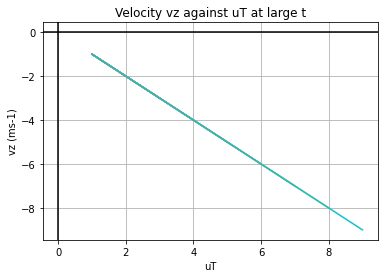

In [153]:
#Cell 10
#Plotting vz against uT with a large value of t to show a more direct relationship between the final velocity and uT
uT_values = np.arange(0, 10, 1)
vz_values.clear()

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("uT")
plt.ylabel("vz (ms-1)")
plt.title("Velocity vz against uT at large t")

for i in uT_values:
    vz_values.append(sy.N(vz[0].subs({t: 500, g:10, uT:i})))
    plt.plot(vz_values)

The first graph shows that at any values of uT, the velocity vz converges to a final value. Looking closely at the final value for vz and uT, it can be found that the relationship is linear between them, shown more clearly on the second graph, specifically the final value of vz is the negative of uT. This is convienient because it allows the person conducting the experiment to know the final output easily with a single value.

In [154]:
#Cell 11
#Calculate the Effect of Drag on a Dropped Cannonball

h_value = 500

#sy.solve(z, t)[0] gives negative solution as time has to be positive, therefore it is discarded
t_drag0 = sy.solve(z, t)[0].subs({uT: 100, g:10, z0: 10})
print("Value of the first solution:", sy.N(t_drag0), ". This is discarded")

#The second solution is used instead
t_eq = sy.solve(z, t)
t_value = t_eq[1].subs({uT: 100, g:10, z0: h_value})
print("The second solution is positive:", sy.N(t_value))

Value of the first solution: -1.41657175927695 . This is discarded
The second solution is positive: 10.8503850194839


In [155]:
#Cell 12
#Compare the time taken for it to reach the ground with and without the drag force
t_drag = sy.N(t_value)
t_nodrag = (h_value / 0.5 / 10) ** 0.5
print("Time taken wth drag force: ", t_drag)
print("Time taken without drag force: ", t_nodrag)
print("It takes", t_drag - t_nodrag, "seconds longer with drag")

Time taken wth drag force:  10.8503850194839
Time taken without drag force:  10.0
It takes 0.850385019483877 seconds longer with drag


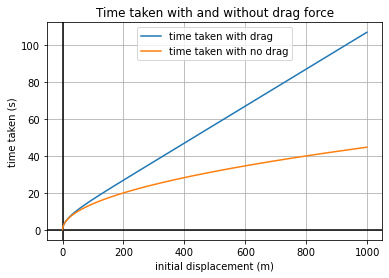

In [156]:
#Cell 13
#A graph of time taken with and without drag force against varying initial displacement (not apart of the task)
h_values = np.arange(0.1, 10000, 10)

t_drag_values = []
t_nodrag_values = []

for i in h_values:
    t_drag = t_eq[1].subs({uT: 100, g:10, z0: i})
    t_nodrag = (i / 0.5 / 10) ** 0.5
    t_drag_values.append(t_drag)
    t_nodrag_values.append(t_nodrag)
    

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("Time taken with and without drag force")
plt.plot(t_drag_values, label="time taken with drag")
plt.plot(t_nodrag_values, label="time taken with no drag")
plt.xlabel("initial displacement (m)")
plt.ylabel("time taken (s)")
plt.legend()

In [157]:
##################################################################################################

In [158]:
#II: Numerical Analysis of the Role of Drag on a dropped cannonball

Text(0.5, 1.0, 'displaecment z and velocity vz against time t')

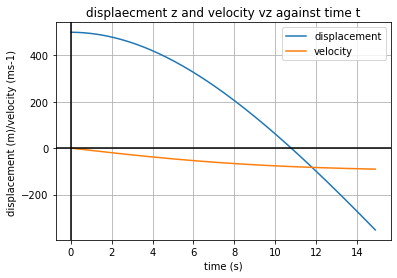

In [159]:
#Cell 14
#17
vz_list = [0]
z_list = [500]
analytical_z_list = [0]
dt = 0.1
uT_val = 100
g_val = 10
t_list = [0]

#loopin through N iterations, calculating z and vz iteratively
for i in range(1, 150):
    t_list.append(i * dt)
    vz_list.append(sy.N(vz_list[-1]) + dt * (-g_val -(g_val / uT_val**2) * (sy.N(vz_list[-1])**2)**0.5 * sy.N(vz_list[-1])))
    z_list.append(sy.N(z_list[-1]) + dt * sy.N(vz_list[-1]))
    
    
#plotting vz and z on the same graph against t
plt.plot(t_list, z_list, label="displacement")
plt.plot(t_list, vz_list, label="velocity")
plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("time (s)")
plt.ylabel("displacement (m)/velocity (ms-1) ")
plt.title("displaecment z and velocity vz against time t")

Text(0, 0.5, 'global error (m)')

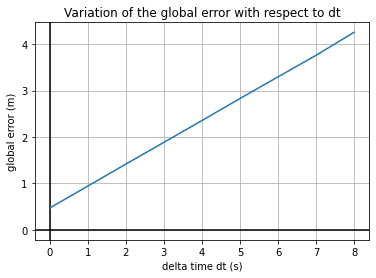

In [160]:
#Cell 15
#Varying dt to show the global error is a linear function of dt
dt_list = np.arange(0.01, 0.1, 0.01)
global_err_list = []

#looping through different values of dt
for dt in dt_list:
    vz_list = [0]
    z_list = [0]
    analytical_z_list = [0]
    time_list = np.arange(0, 10, dt)
    
    #for every value of dt, append the final differences between the analytical and numerical solution to the global error list
    for i in time_list:
        z_list.append(sy.N(z_list[-1]) + dt * sy.N(vz_list[-1]))
        vz_list.append(sy.N(vz_list[-1]) + dt * (-g_val -(g_val / uT_val**2) * (sy.N(vz_list[-1])**2)**0.5 * sy.N(vz_list[-1])))
        analytical_z_list.append(sy.N(analytical_z_list[0]) - (uT_val**2/g_val) * sy.log(sy.cosh(g_val*i/uT_val)))
        
    global_err_list.append(analytical_z_list[-1] - z_list[-1])
    
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("Variation of the global error with respect to dt")
plt.plot(global_err_list)
plt.xlabel("delta time dt (s)")
plt.ylabel("global error (m)")

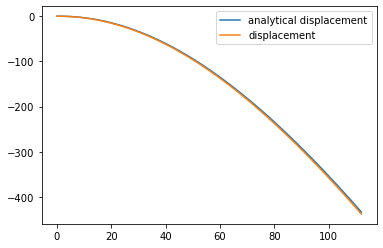

In [161]:
#Cell 16
plt.plot(analytical_z_list, label="analytical displacement")
plt.plot(z_list, label="displacement")
plt.legend()

In [162]:
####################################################################################

In [163]:
#B: Numerical Study of the Role of Drag on a Launched Cannonball

In [164]:
#Cell 17
x_list = []
z_list = []
g_val = 10
uT_val = 100

dt = 0.005


#Function to calculate the horizontal x values and vertical z values, it is reused several time.
def calc_trajectory(initial_velocity_x, initial_velocity_z, max_time = 20, end=False, delta_vx = 0):
    x_list.clear()
    z_list.clear()
    vx = initial_velocity_x
    vz = initial_velocity_z
    x = 0
    z = 0

    dt_list = np.arange(0, max_time, dt)

    #loop through dt and iteratively calculate x, z, vx and vz
    for i in dt_list:
        #discretised equations
        ax = -(g_val / (uT_val**2)) * (np.sqrt((vx - delta_vx)**2 + vz**2)) * vx
        az = -(g_val / (uT_val**2)) * (np.sqrt((vx - delta_vx)**2 + vz**2)) * vz - g_val
    
        x += vx * dt
        z += vz * dt
        vx += ax * dt
        vz += az * dt
        
        if (end == True):
            if z <= 0:
                return
    
        x_list.append(x)
        z_list.append(z)


calc_trajectory(20, 80)

Text(0, 0.5, 'horizontal displacement (m)')

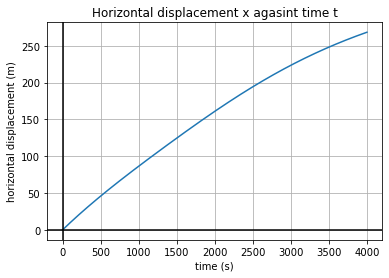

In [165]:
#Cell 18
plt.plot(x_list)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("Horizontal displacement x agasint time t")
plt.xlabel("time (s)")
plt.ylabel("horizontal displacement (m)")

Text(0.5, 1.0, 'Vertical displacement z agaisnt time t')

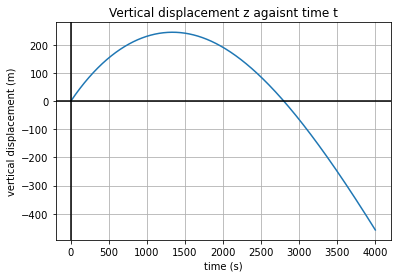

In [166]:
#Cell 19
plt.plot(z_list)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("time (s)")
plt.ylabel("vertical displacement (m)")
plt.title("Vertical displacement z agaisnt time t")

Text(0, 0.5, 'vertical displacement (m)')

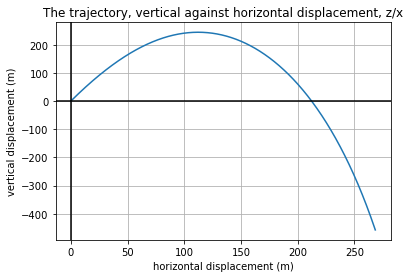

In [167]:
#Cell 20
plt.plot(x_list, z_list)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("The trajectory, vertical against horizontal displacement, z/x")
plt.xlabel("horizontal displacement (m)")
plt.ylabel("vertical displacement (m)")

In [168]:
#Cell 21
#Calculating the time of flight of the cannonball

time_of_flight = 0

#loop through the vertical displacement list until the value becomes negative which means it has hit the ground
for i in range(len(z_list)):
    if z_list[i] <= 0:
        time_of_flight = i * dt
        break

        
time_of_flight

13.99

In [169]:
#Cell 22
time_of_flight_nearest = round(time_of_flight, 0)
time_of_flight_nearest

14.0

In [170]:
#Cell 23
displacement = round(x_list[int(time_of_flight / dt)], -1)
displacement

210.0

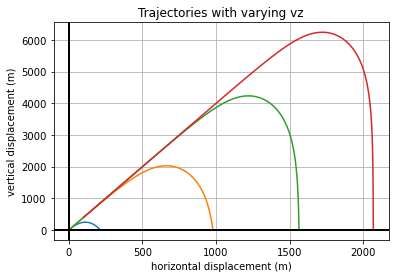

In [171]:
#Cell 24
#Different trajectories with varying orders of magnitudes of vz
for i in range(1, 5):
    calc_trajectory(2 * 10**i, 8 * 10**i, 100, True)
    
    plt.plot(x_list, z_list)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.xlabel("horizontal displacement (m)")
    plt.ylabel("vertical displacement (m)")
    plt.title("Trajectories with varying vz")

Trajectories with large initial velocity looks similar to what Aristotle predicted, with a roughly straight flight path angled upwards, reaching the highest point and quickly dropping down almost vertically at the end. Whilst the trajectory without air resistance would look like a parabolic arc.

At small initial velocities, the trajectory represents more of a parabolic arc rather than what Aristotle predicted, the trajectory is only truely parabolic when the initial velocity is infinitesimally small.

In [172]:
########################################################################

In [173]:
#C: Predict the Landing Point of a Cannonball

Text(0.5, 1.0, 'Final horizontal displacement x against angle in degrees')

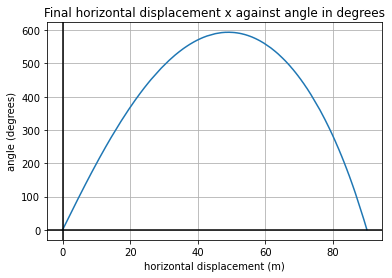

In [178]:
#Cell 25
vm_val = 100
vx_val = 0
vz_val = 0

displacement_list = []
angle_list = np.arange(0, 90.1, 0.1)

#loop through 0 to 90 degrees and calculate x 
for i in angle_list:
    vx_val = vm_val * np.sin(i / 180 * np.pi)    #converts degrees into raidians
    vz_val = vm_val * np.cos(i / 180 * np.pi)
    calc_trajectory(vx_val, vz_val, 30, True)
            
    displacement_list.append(x_list[-1])


plt.plot(angle_list, displacement_list)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("horizontal displacement (m)")
plt.ylabel("angle (degrees)")
plt.title("Final horizontal displacement x against angle in degrees")
        

In [179]:
#Cell 26
#subtract every value by the target distance to find the minimum values
distance_target_1 = 250
delta_displacement_list = []
for i in displacement_list:
    delta_displacement_list.append(np.sqrt((i - 250)**2))
    
    
    
#find the minimum value and its index
lowest_value = delta_displacement_list[0]
lowest_index = 0
for i in range(1, len(delta_displacement_list)):
    if delta_displacement_list[i] < lowest_value:
        lowest_value = delta_displacement_list[i]
        lowest_index = i

#find the second lowest value and index because a projectile always have 2 values of angle that reaches the same horizontal distance
delta_displacement_list.pop(lowest_index)
second_lowest_value = delta_displacement_list[0]
second_lowest_index = 0

for i in range(1, len(delta_displacement_list)):
    if delta_displacement_list[i] < second_lowest_value:
        second_lowest_value = delta_displacement_list[i]
        second_lowest_index = i
        

        
print("The angle required is", round(lowest_index * 0.1, 0), "degrees, or", round(second_lowest_index * 0.1, 0), "degrees")

The angle required is 13.0 degrees, or 81.0 degrees


Text(0.5, 1.0, 'Final displacement x against angle with wind')

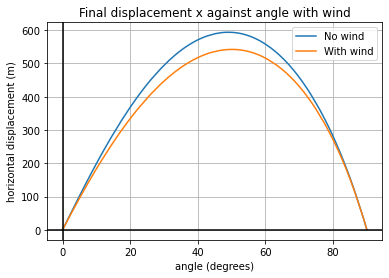

In [180]:
#Cell 27
plt.plot(angle_list, displacement_list, label="No wind")

vm_val = 100
vx_val = 0
vz_val = 0

displacement_list = []
angle_list = np.arange(0, 90, 0.1)

#loop through angles and calculate the trajectory same as above
for i in angle_list:
    vx_val = vm_val * np.sin(i / 180 * np.pi)
    vz_val = vm_val * np.cos(i / 180 * np.pi)
    #The wind speed is factored in the calc_trajectory function passed in as the 5th parameter
    calc_trajectory(vx_val, vz_val, 30, True, -20)
            
    displacement_list.append(x_list[-1])

    
    
plt.plot(angle_list, displacement_list, label="With wind")
plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("angle (degrees)")
plt.ylabel("horizontal displacement (m)")
plt.title("Final displacement x against angle with wind")


In [181]:
#Cell 28
#Same code as above
#subtract every value by the target distance to find the minimum values
distance_target_2 = 300
delta_displacement_list = []
for i in displacement_list:
    delta_displacement_list.append(np.sqrt((i - distance_target_2)**2))
    

#find the minimum value and its index
lowest_value = delta_displacement_list[0]
lowest_index = 0
for i in range(1, len(delta_displacement_list)):
    if delta_displacement_list[i] < lowest_value:
        lowest_value = delta_displacement_list[i]
        lowest_index = i
        
#find the second lowest value and index because a projectile always have 2 values of angle that reaches the same horizontal distance
delta_displacement_list.pop(lowest_index)
second_lowest_value = delta_displacement_list[0]
second_lowest_index = 0

for i in range(1, len(delta_displacement_list)):
    if delta_displacement_list[i] < second_lowest_value:
        second_lowest_value = delta_displacement_list[i]
        second_lowest_index = i
        
        
       
print("The angle required is", round(lowest_index * 0.1, 0), "degrees, or", round(second_lowest_index * 0.1, 0), "degrees")

The angle required is 18.0 degrees, or 78.0 degrees
